#**IDENTIFICANDO Y EXCLUYENDO OUTLIERS**
---



In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (14, 6)) # modifica el ancho y alto de la figura

In [57]:
datos = pd.read_csv('alquiler_residencial3.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Lince,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Breña,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
5,Casa,Lurín,3,2,1,135,3000.0,0.0,0.0,22.22,Casa
6,Casa,San Borja,2,0,0,40,950.0,0.0,50.0,23.75,Casa
7,Casa,San Miguel,4,1,1,191,4000.0,300.0,0.0,20.94,Casa
8,Casa,Mi Perú,5,4,2,450,7000.0,0.0,500.0,15.56,Casa
9,Casa,San Juan de Miraflores,2,1,0,59,1200.0,170.0,0.0,20.34,Casa


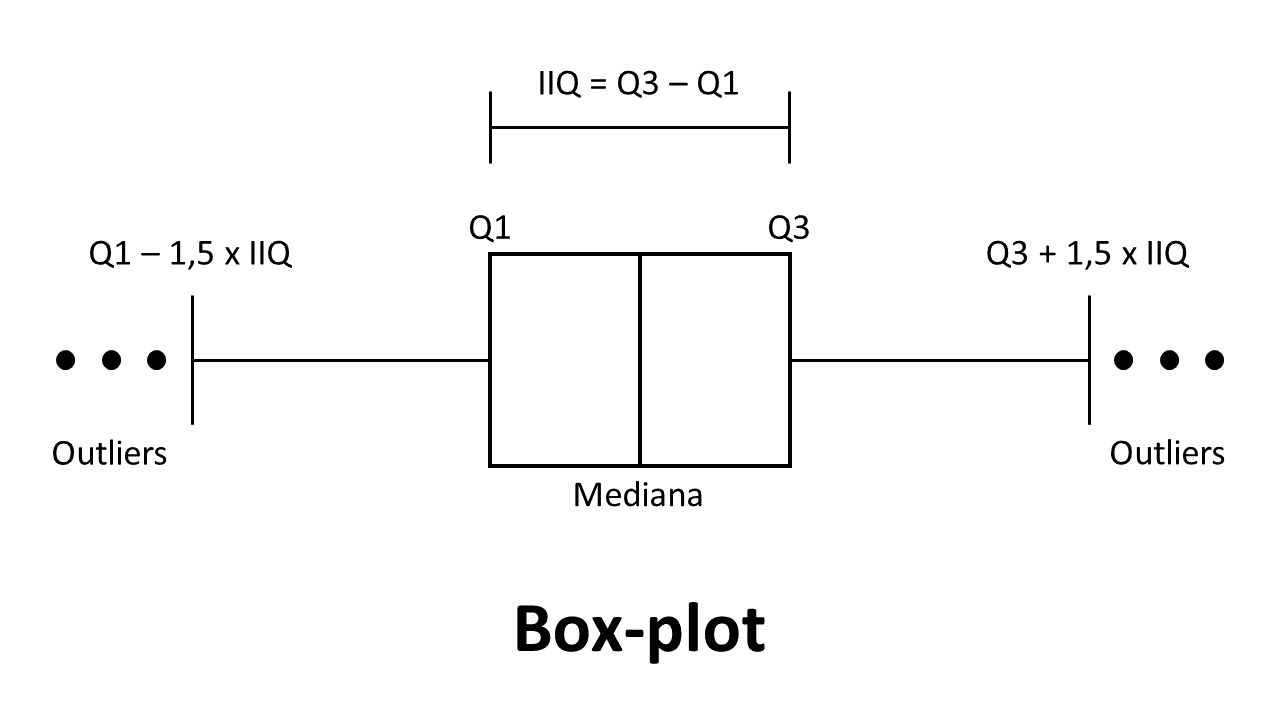

<Axes: >

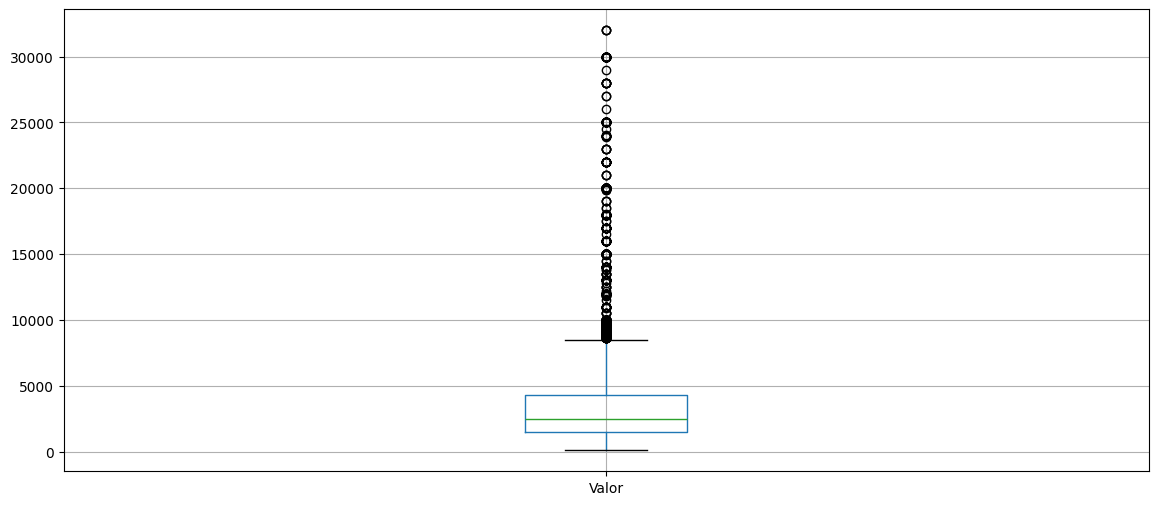

In [58]:
#Creamos el Gráfico Box Plot
datos.boxplot(['Valor'])

In [59]:
#Hay 5 registros mayores a 500.000
datos[datos['Valor']  >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado


In [60]:
#creamos el objeto valor
valor = datos['Valor']

In [61]:
#Calculamos los quantiles
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1 # Rango Intercuartilico
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [62]:
#Establecemos los criterios de seleccion
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)
datos_nuevo = datos[seleccion]

<Axes: >

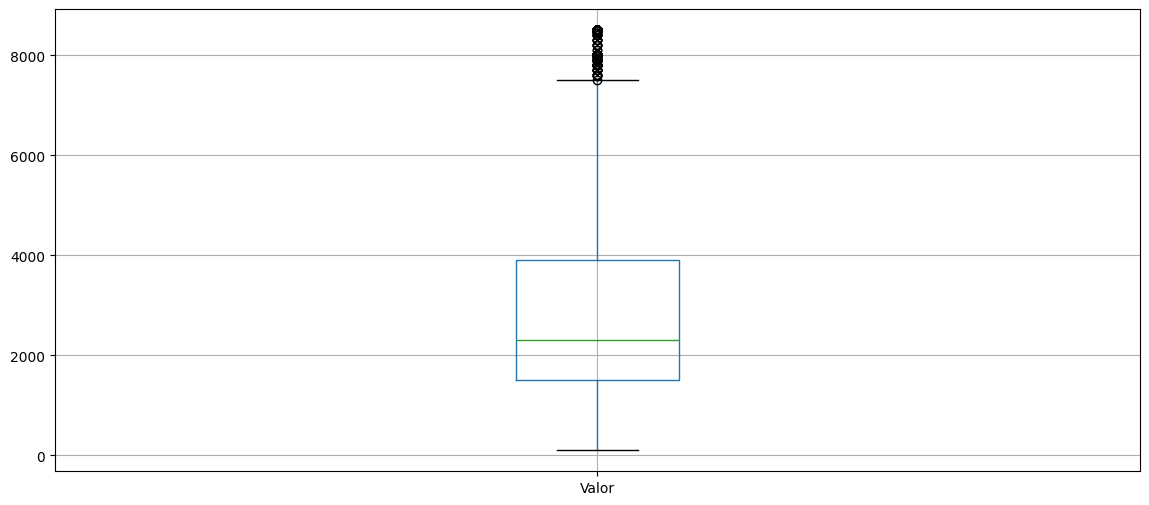

In [63]:
datos_nuevo.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

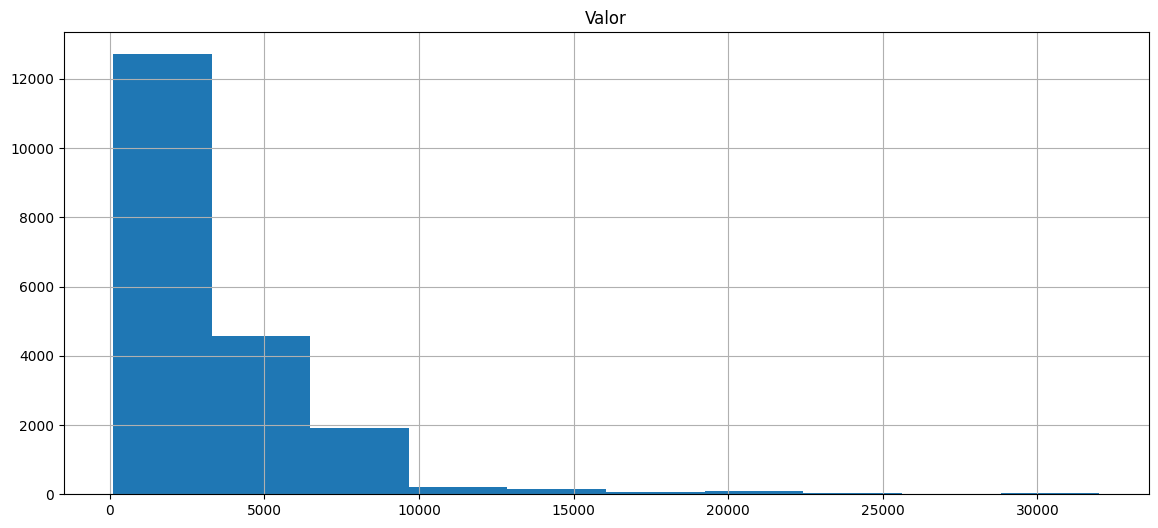

In [64]:
#Creamos el Histograma
datos.hist(['Valor'])
# Es dificil tomar deciciones con este gráfico

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

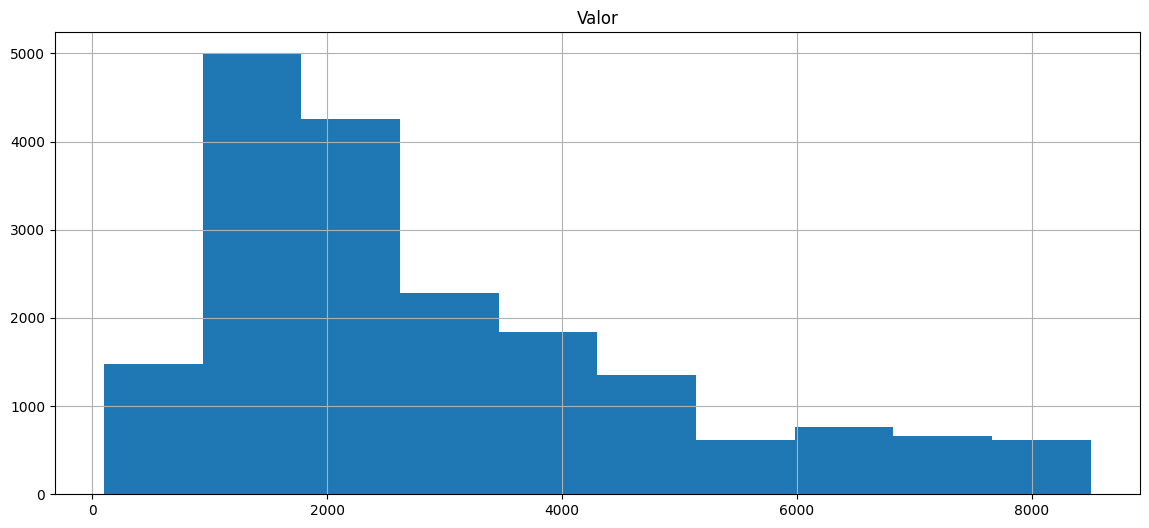

In [65]:
#Creamos el Histograma
datos_nuevo.hist(['Valor'])
# Se puede observar la distribución de los datos ya que los alquileres estan clasificados

#**TRATAMIENTO DE OUTLIERS**

In [66]:
#El BoxPlot anterior no tuvo en cuenta la columna Tipo, por tar razón se debe filtrar por esa columna con el parametro by()
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Lince,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Breña,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
5,Casa,Lurín,3,2,1,135,3000.0,0.0,0.0,22.22,Casa
6,Casa,San Borja,2,0,0,40,950.0,0.0,50.0,23.75,Casa
7,Casa,San Miguel,4,1,1,191,4000.0,300.0,0.0,20.94,Casa
8,Casa,Mi Perú,5,4,2,450,7000.0,0.0,500.0,15.56,Casa
9,Casa,San Juan de Miraflores,2,1,0,59,1200.0,170.0,0.0,20.34,Casa


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

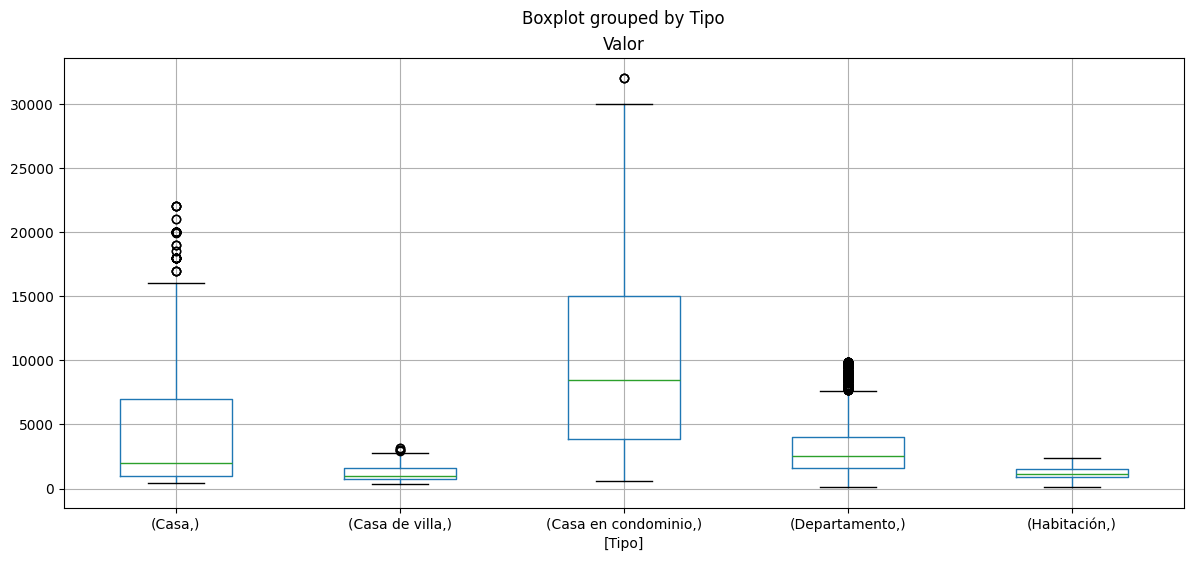

In [67]:
datos.boxplot(['Valor'], by = ['Tipo'])

In [68]:
grupo_tipo = datos.groupby(['Tipo'])['Valor']

In [69]:
type(grupo_tipo) # Guardamos todo en una Seria y no en un DataFrame

pandas.core.groupby.generic.SeriesGroupBy

In [70]:
# Para ver su contenido ejecutamos el atributo groups el cual nos crea un diccionario con las posiciones donde se encuentran los locales
grupo_tipo.groups

{'Casa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Casa de villa': [898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, ...], 'Casa en condominio': [1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138,

In [71]:
#Calculamos los quantiles del objeto grupo_tipo
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1 # Rango Intercuartilico
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [72]:
#Esto me guarda la información por cada uno de los tipos
limite_inferior

,Valor
Tipo,
Casa,-8000.0
Casa de villa,-525.0
Casa en condominio,-12750.0
Departamento,-2000.0
Habitación,0.0


In [73]:
limite_superior

,Valor
Tipo,
Casa,16000.0
Casa de villa,2875.0
Casa en condominio,31650.0
Departamento,7600.0
Habitación,2400.0


In [74]:
datos_new =pd.DataFrame()
for tipo in grupo_tipo.groups.keys(): #Recorre cada una de losa posiciones del objeto grupo tipo
  eh_tipo = datos['Tipo']== tipo
  eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
  seleccion = eh_tipo & eh_dentro_limite
  datos_seleccion = datos[seleccion]
  datos_new = pd.concat([datos_new, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

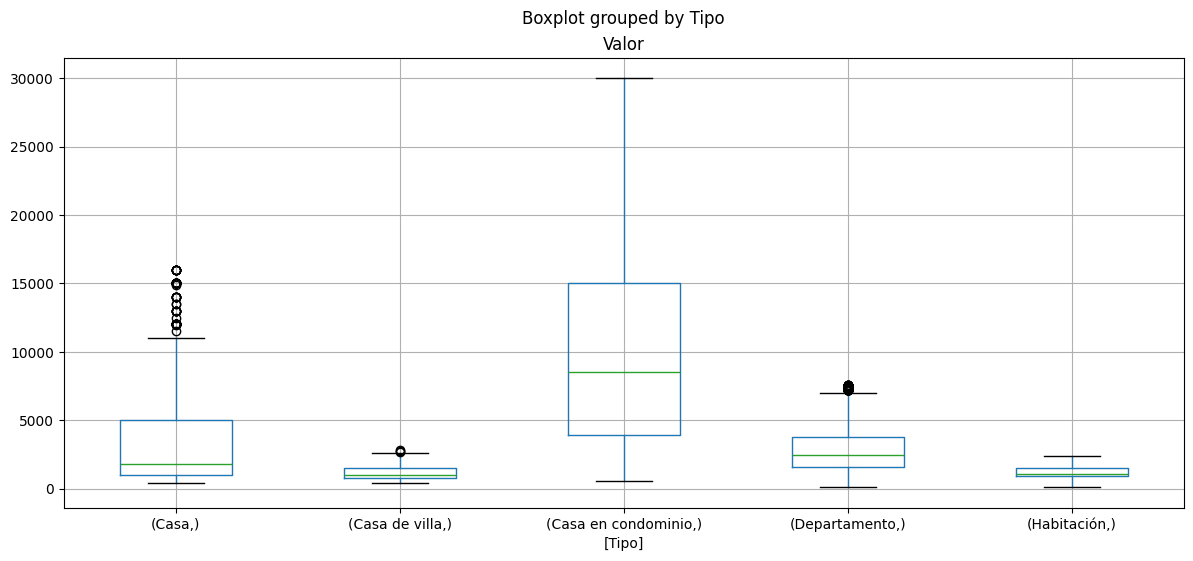

In [75]:
datos_new.boxplot(['Valor'], by= ['Tipo'])

array([[<Axes: title={'center': '(Casa,)'}>,
        <Axes: title={'center': '(Casa de villa,)'}>],
       [<Axes: title={'center': '(Casa en condominio,)'}>,
        <Axes: title={'center': '(Departamento,)'}>],
       [<Axes: title={'center': '(Habitación,)'}>, <Axes: >]],
      dtype=object)

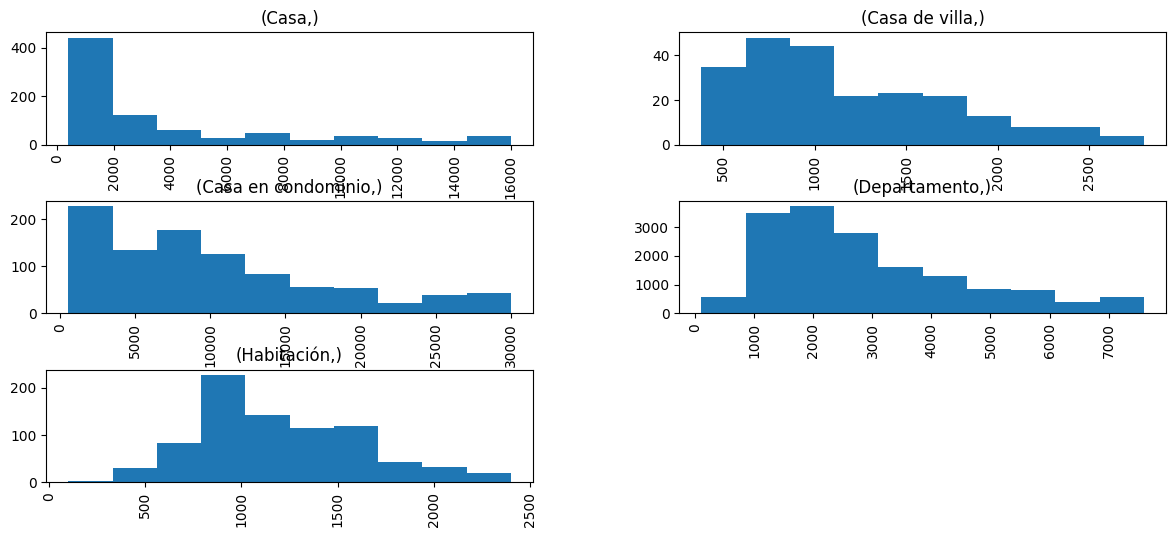

In [76]:
datos_new.hist(['Valor'], by= ['Tipo'])

In [77]:
datos_new.to_csv('alquiler_residencial3.csv', sep= ';', index = False)

#**MÁS SOBRE GRÁFICOS**

In [78]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (15, 10)) # modifica el ancho y alto de la figura

In [79]:
datos = pd.read_csv('alquiler_residencial4.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Lince,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Breña,1,0,0,33,1200.0,0.0,0.0,36.36,Casa
5,Casa,Lurín,3,2,1,135,3000.0,0.0,0.0,22.22,Casa
6,Casa,San Borja,2,0,0,40,950.0,0.0,50.0,23.75,Casa
7,Casa,San Miguel,4,1,1,191,4000.0,300.0,0.0,20.94,Casa
8,Casa,Mi Perú,5,4,2,450,7000.0,0.0,500.0,15.56,Casa
9,Casa,San Juan de Miraflores,2,1,0,59,1200.0,170.0,0.0,20.34,Casa


In [80]:
# Creamos un área
area = plt.figure()

<Figure size 1500x1000 with 0 Axes>

In [81]:
#cremos las dimensiones de nuestro gráfico
g1 = area.add_subplot(2, 2, 1) #Indica que se crean 2 lineas, 2 columnas y se ubicara en la posición 1
g2 = area.add_subplot(2, 2, 2) #Indica que se crean 2 lineas, 2 columnas y se ubicara en la posición 2
g3 = area.add_subplot(2, 2, 3) #Indica que se crean 2 lineas, 2 columnas y se ubicara en la posición 3
g4 = area.add_subplot(2, 2, 4) #Indica que se crean 2 lineas, 2 columnas y se ubicara en la posición 4

In [82]:
#Configuramos el área de los gráficos
g1.scatter(datos.Valor, datos.Area) # Gráfico de dispersión
g1.set_title('Valor vs Área') # coloca el titulo del gráfico

g2.hist(datos.Valor) # Gráfico de Histográma
g2.set_title('Histograma') # coloca el titulo del gráfico

datos_g3= datos.Valor.sample(100) # Genera una muesta aleatoria de X registros en este caso 100, Esta se actualiza cada vez que se ejecuta la información
datos_g3.index =range(datos_g3.shape[0])
g3.plot(datos_g3) # Gráfico de línea
g3.set_title('Muestra de la columna Valores') # coloca el titulo del gráfico

grupo = datos.groupby('Tipo')['Valor']
label = grupo.mean().index # Generamos etiquetas para mostrar los indices
valores = grupo.mean().values # Generamos etiquetas para mostrar los valores
g4.bar(label, valores) # Gráfico de barras
g4.set_title('Valor medio por Tipo') # coloca el titulo del gráfico


Text(0.5, 1.0, 'Valor medio por Tipo')

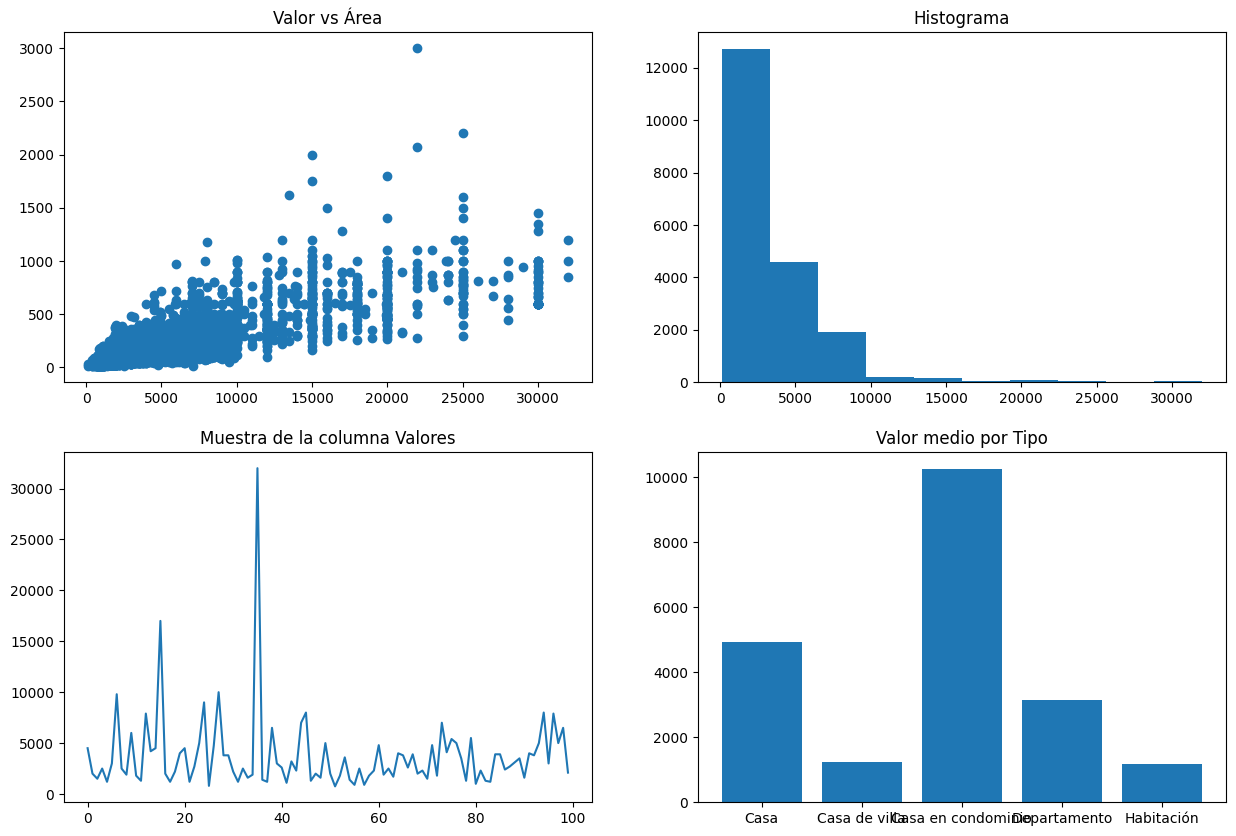

In [83]:
# Creamos los graficos
area

In [84]:
# Guardamos la figura
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

### Ejercicio:
Probemos nuestro conocimiento sobre el paquete matplotlib. Para este ejercicio, considere el archivo alquiler_muestra.csv e indique en las opciones a continuación qué código es necesario para generar los gráficos de la siguiente figura:


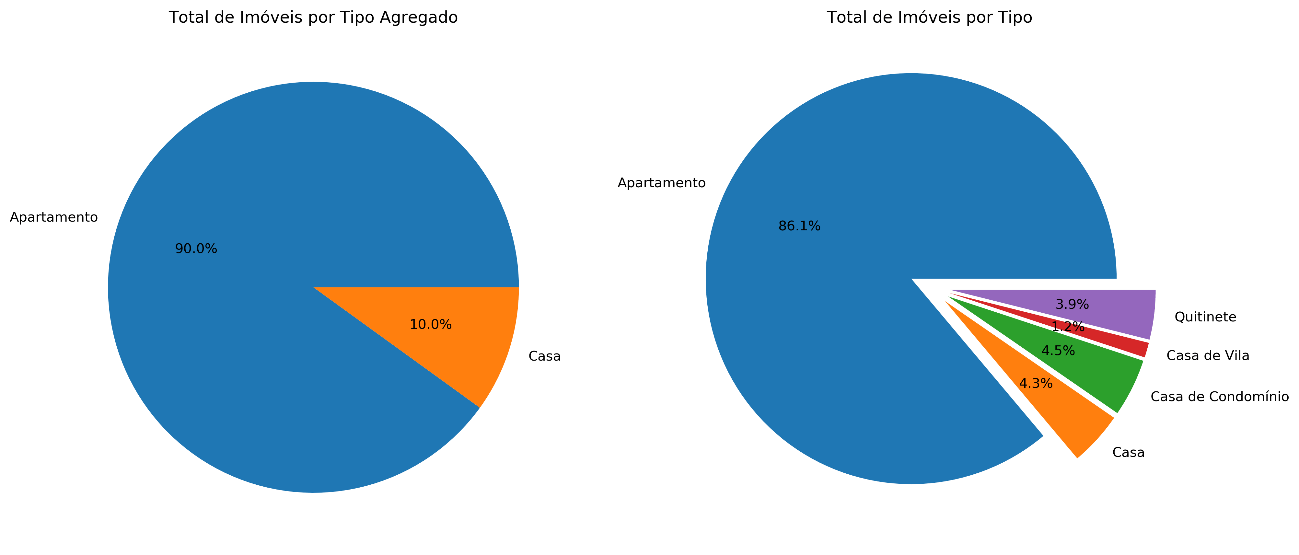

En este ejercicio, estamos presentando el gráfico de pizza que puede ser obtenido aplicando el método pie(), de matplotlib. Considere el código inicial a continuación para elegir la alternativa correcta:


In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

datos = pd.read_csv('alquiler_residencial4.csv', sep = ';')

Text(0.5, 1.0, 'Total de Inmuebles por Tipo')

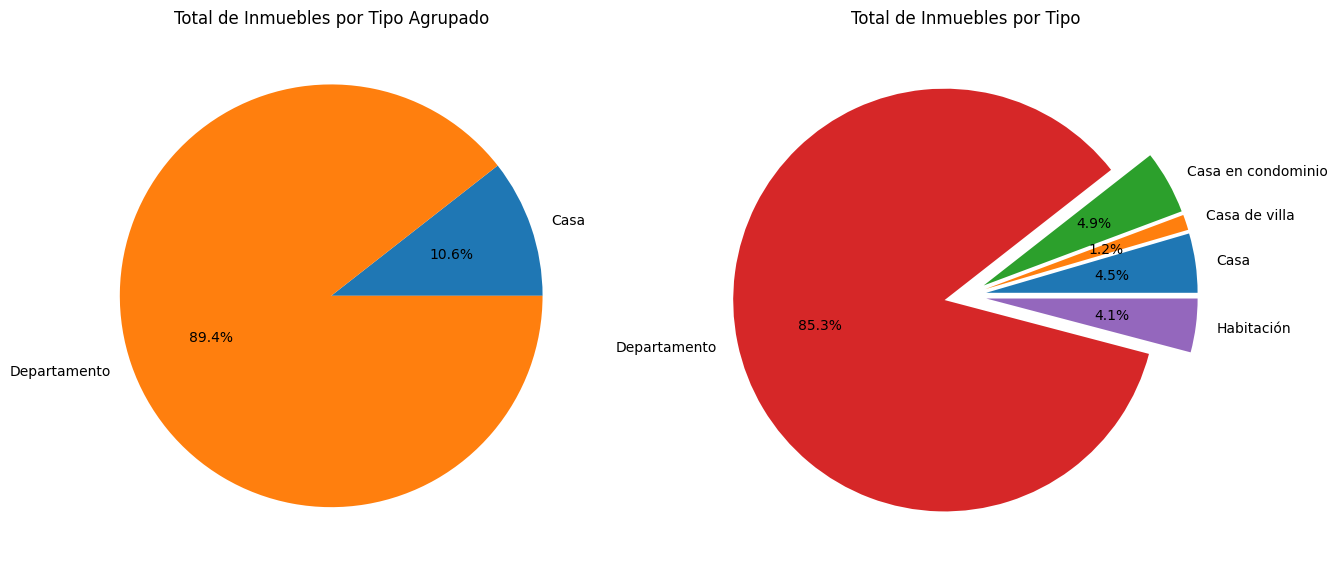

In [88]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = datos.groupby('Tipo Agrupado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Inmuebles por Tipo Agrupado')
grupo2 = datos.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Inmuebles por Tipo')

Aprendimos:

- Cómo identificar y eliminar outliers con box plot
- Cómo hacer un gráfico de pizza con la aplicación del método pie(), de la - biblioteca matplotlib